In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# Simple testing with non-physical systems

Testing QuTiP's collapse operators to see how they work

In [14]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]
H = hbar*qt.Qobj([[0,0],[0,10]])
c_ops = [np.sqrt(0.5)*qt.Qobj([[0,1],[0,0]])]
#c_ops = []
tlist = np.linspace(0,100,1000)
result = qt.mesolve(H,kets[1],tlist,e_ops=e_ops, c_ops=c_ops)

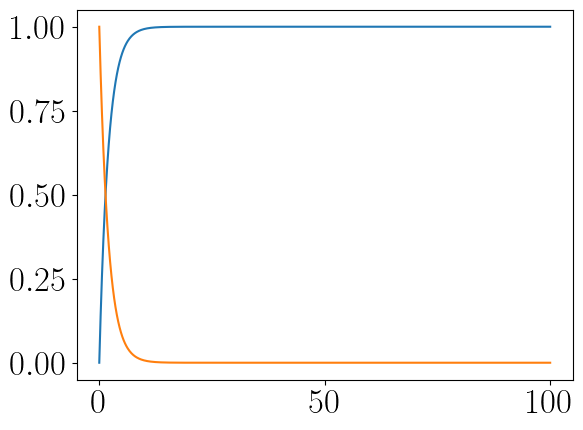

In [15]:
plt.plot(tlist,result.expect[0])
plt.plot(tlist,result.expect[1])

# Photoionisation in the lab frame (i.e testing time-dependent jump operator)

In [16]:
system = Ps_system()

rate = 1
#system.c_ops = np.sqrt(rate)*np.asarray([system.kets[-1]*system.kets[n].dag() for n in range(system.N_bins)])

flip_pulse = {"rabi0" : 2*np.pi*(3000e-3), "detuning": 0,"chirp" : 2*np.pi*(4000e-3),"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

#system.init_distribution_singular()
system.init_distribution_constant()
#system.init_MBdistribution()
system.init_states_ground()
#system.init_states_desymmetrized()
system.set_Hamiltonian_MT_dissipation()
system.evolve()

AttributeError: 'Ps_system' object has no attribute 'set_Hamiltonian_MT_dissipation'

In [ ]:
# Testing how to create a new axis

arr = np.asarray([[1,0],[0,1]])
arr2 = np.insert(arr,2,[0,0],0)
arr3 = np.insert(arr2,2,[0,0,1],1)
print("arr2=\n",arr2)
print("arr3=\n",arr3)


arr2=
 [[1 0]
 [0 1]
 [0 0]]
arr3=
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
system = Ps_system(isDissipative=True)
flip_pulse = {"rabi0" : 2*np.pi*(2000e-3), "detuning": 0,"chirp" : 2*np.pi*(500e-3),"pulse_duration" : 1,"unit_wavevector":-1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

system.init_distribution_constant()
system.init_states_general_flattop(internal_state_arr=np.asarray([[1,0,0],[0,0,0],[0,0,0]]))
#system.set_Hamiltonian_MT()
system.evolve()

[0.00192358 0.0037738  0.00712398 0.01294026 0.02261722 0.03803748
 0.06155458 0.09584845 0.14361041 0.20704411 0.28722083 0.38339381
 0.49243665 0.60859973 0.72375113 0.82817643 0.91186928 0.96609185
 0.9848733  0.96609185 0.91186928 0.82817643 0.72375113 0.60859973
 0.49243665 0.38339381 0.28722083 0.20704411 0.14361041 0.09584845
 0.06155458 0.03803748 0.02261722 0.01294026 0.00712398 0.0037738
 0.00192358]
10.8%. Run time:   8.44s. Est. time left: 00:00:01:09
21.6%. Run time:  13.99s. Est. time left: 00:00:00:50
32.4%. Run time:  22.39s. Est. time left: 00:00:00:46
40.5%. Run time:  32.09s. Est. time left: 00:00:00:47
51.4%. Run time:  49.63s. Est. time left: 00:00:00:47
62.2%. Run time:  64.66s. Est. time left: 00:00:00:39
70.3%. Run time:  71.07s. Est. time left: 00:00:00:30
81.1%. Run time:  79.01s. Est. time left: 00:00:00:18
91.9%. Run time:  90.65s. Est. time left: 00:00:00:07
Total run time: 102.33s


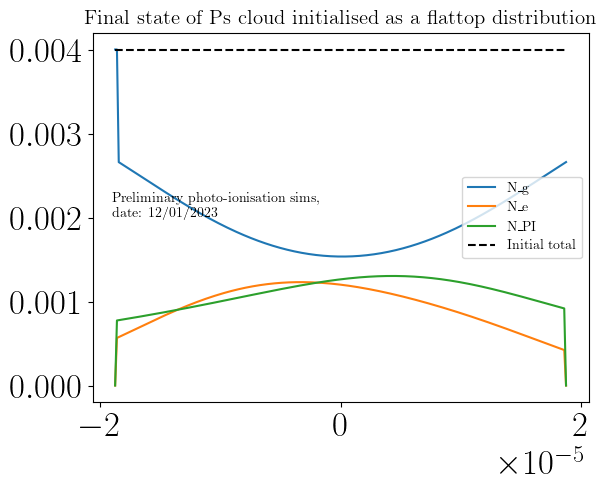

In [ ]:


plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,0:250,-1],label="N_g")
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,250:500,-1],label="N_e")
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,500:750,-1],label="N_PI")
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,0:250,0],label="Initial total",ls="dashed",color="black")
plt.legend(loc="right",fontsize=10)
plt.text(-1.9e-5,0.002,"Preliminary photo-ionisation sims,\n date: {}".format(date.today().strftime("%d/%m/%Y")),fontsize=10)
plt.title(r"Final state of Ps cloud initialised as a flattop distribution",fontsize=15)
#plt.savefig("./figures/jan_2023/preliminary_flattop_photoionisation_opposite_k.jpg",bbox_inches="tight")

plt.show()

# Photoionisation in rotating frame

In [ ]:
system = Ps_system(isDissipative=True)
flip_pulse = {"rabi0" : 2*np.pi*(2000e-3), "detuning": 0,"chirp" : 2*np.pi*(500e-3),"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

system.init_distribution_constant()
system.init_states_general_flattop(internal_state_arr=np.asarray([[1,0,0],[0,0,0],[0,0,0]]))
#system.set_Hamiltonian_MT()
system.evolve()

TypeError: Ps_system.__init__() got an unexpected keyword argument 'isDissipative'

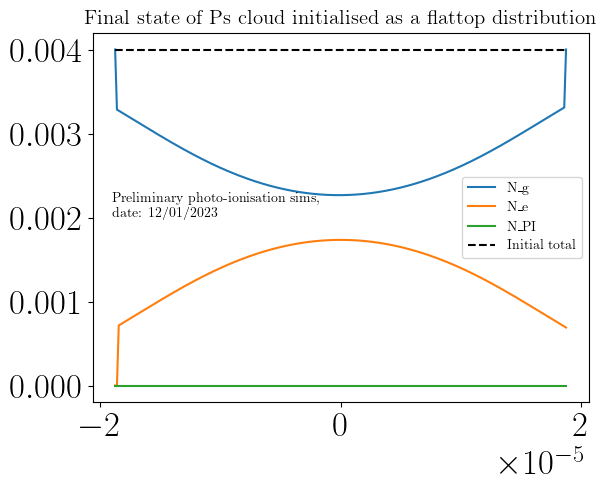

In [ ]:


plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,0:250,-1],label="N_g")
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,250:500,-1],label="N_e")
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,500:750,-1],label="N_PI")
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,0:250,0],label="Initial total",ls="dashed",color="black")
plt.legend(loc="right",fontsize=10)
plt.text(-1.9e-5,0.002,"Preliminary photo-ionisation sims,\n date: {}".format(date.today().strftime("%d/%m/%Y")),fontsize=10)
plt.title(r"Final state of Ps cloud initialised as a flattop distribution",fontsize=15)
#plt.savefig("./figures/jan_2023/preliminary_flattop_photoionisation_opposite_k.jpg",bbox_inches="tight")

plt.show()

# Dissipation through spontaneous emission & annihilation

In [9]:
system = Ps_system(N_atoms=250)
system.flag_SE_simple = True
rabi0 = 2*np.pi*(3000e-3)
chirp = 2*np.pi*(4000e-3)
no_pulse = {"order":0,"label":"no laser","rabi0" : rabi0, "detuning": 0,"chirp" : chirp,"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
system.init_pulse(no_pulse)
system.init_pulse_cycle()


system.init_distribution_constant()
internal_state_arr = np.zeros((system.internal_dims,system.internal_dims)); internal_state_arr[1][1] = 1
system.init_states_general_flattop(internal_state_arr)
#system.set_Hamiltonian_MT()
system.evolve()

Simulating pulse number 0 ....
Done!


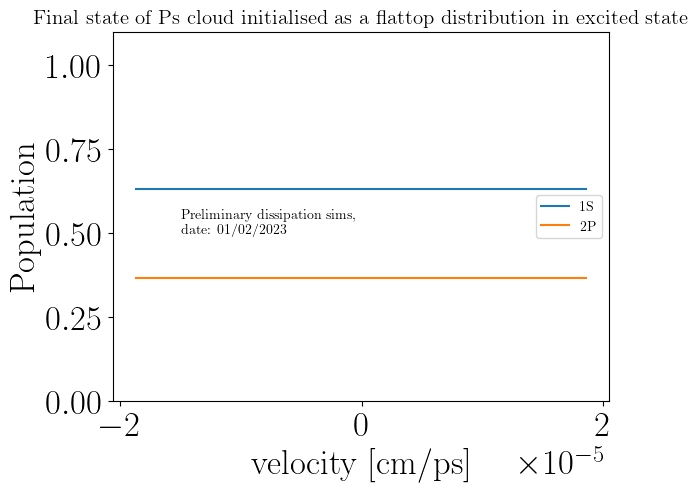

In [10]:
for key in system.expect:
    plt.plot(system.velocity_bins,system.expect[key][1],label=key)

#plt.plot(system.velocity_bins,total,label="total")
#plt.plot(system.velocity_bins,np.full(system.N_bins,1),label="Initial total",ls="dashed",color="black")
plt.legend(loc="right",fontsize=10)
plt.text(-1.5e-5,0.5,"Preliminary dissipation sims,\n date: {}".format(date.today().strftime("%d/%m/%Y")),fontsize=10)
plt.title(r"Final state of Ps cloud initialised as a flattop distribution in excited state",fontsize=15)
plt.xlabel("velocity [cm/ps]")
plt.ylabel("Population")
plt.ylim(0,1.1)
#plt.savefig("./figures/jan_2023/preliminary_flattop_se.jpg",bbox_inches="tight")

plt.show()

In [ ]:
#print(system.H[2])
print(system.tensor_vel)

Quantum object: dims = [[250, 3], [250, 3]], shape = (750, 750), type = oper, isherm = True
Qobj data =
[[-1.875e-05  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -1.875e-05  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.875e-05 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  1.875e-05  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  1.875e-05  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  1.875e-05]]


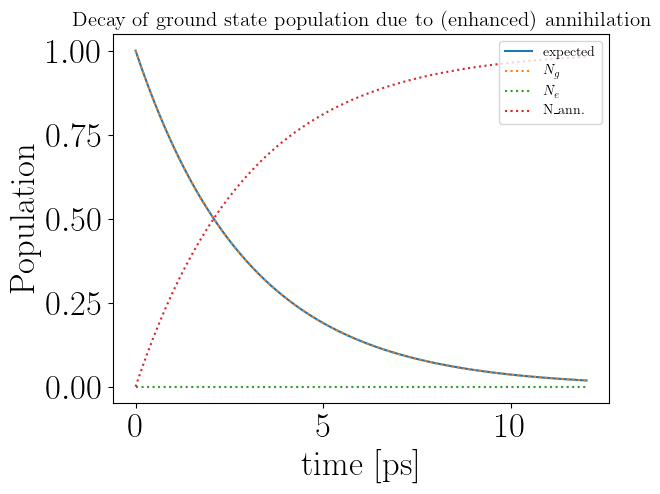

In [ ]:
decay = lambda t:np.exp(-1/3*t) # ps, analytical population of ground state with decay rate 1/3ps

plt.plot(system.tlist,decay(system.tlist),label="expected")
plt.plot(system.tlist,np.asarray(system.saved_expect)[0,1,:],label=r"$N_g$",ls='dotted')
plt.plot(system.tlist,np.asarray(system.saved_expect)[0,251,:],label=r"$N_e$",ls="dotted")
plt.plot(system.tlist,np.asarray(system.saved_expect)[0,501,:],label="N_ann.",ls="dotted")

total = np.asarray(system.saved_expect)[0,0:250,-1]+np.asarray(system.saved_expect)[0,250:500,-1]
#plt.plot(system.velocity_bins,total,label="total")

#plt.plot(system.velocity_bins,np.full(system.N_bins,1),label="Initial total",ls="dashed",color="black")
plt.legend(loc="upper right",fontsize=10)
#plt.text(-1.5e-5,0.5,"Preliminary dissipation sims,\n date: {}".format(date.today().strftime("%d/%m/%Y")),fontsize=10)
plt.title(r"Decay of ground state population due to (enhanced) annihilation",fontsize=15)
plt.xlabel("time [ps]")
plt.ylabel("Population")
#plt.savefig("./figures/jan_2023/preliminary_flattop_annihilation_no_pulse_time.jpg",bbox_inches="tight")

plt.show()

In [ ]:
print(qt.ket2dm(qt.basis(3,3)))
print(qt.projection(3,0,1))

ValueError: All basis indices must be `offset <= n < dimension+offset`.